# CASE STUDY - HEART DISEASE PREDICTION



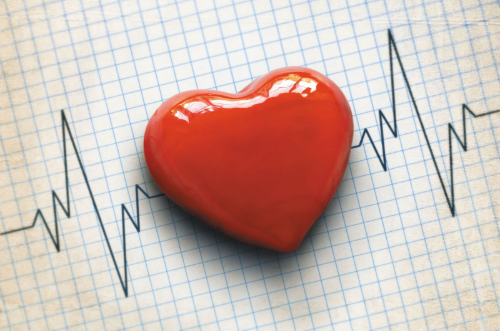

### STEP 1 -  Problem Statement

- Predicting if person has heart disease or not based on serveral observation/features


- We have 13 features and 1 target variable for our data set which are defined as follows:.

    - `age` - age in years
    
    - `sex` - (1 = male; 0 = female)
    
    - `cp` - chest pain type
        - 0: Typical angina: chest pain related decrease blood supply to the heart
        - 1: Atypical angina: chest pain not related to heart
        - 2: Non-anginal pain: typically esophageal spasms (non heart related)
        - 3: Asymptomatic: chest pain not showing signs of disease
        
    - `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause                   for concern
     
    - `chol` - serum cholestoral in mg/dl
        - serum = LDL + HDL + .2 * triglycerides
        - above 200 is cause for concern

    - `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        - '>126' mg/dL signals diabetes

    - `restecg` - resting electrocardiographic results
       -  0: Nothing to note
       - 1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
       - 2: Possible or definite left ventricular hypertrophy.
        Enlarged heart's main pumping chamber
        
    - `thalach` - maximum heart rate achieved 
    
    - `exang` - exercise induced angina (1 = yes; 0 = no)
    
    - `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    
    - `slope` - the slope of the peak exercise ST segment
        - 0: Upsloping: better heart rate with excercise (uncommon)
        - 1: Flatsloping: minimal change (typical healthy heart)
        - 2: Downslopins: signs of unhealthy heart
        
    - `ca` - number of major vessels (0-3) colored by flourosopy
    
    - `thal` - thalium stress result
        - 1,3: normal
        - 6: fixed defect: used to be defect but ok now
        - 7: reversable defect: no proper blood movement when excercising
        
    - `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

### STEP 2 - IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### STEP 3 - IMPORT DATASET & DATA CLEANING

In [2]:
df = pd.read_csv('heart.csv')
print("Data Imported Successfully")

Data Imported Successfully


In [3]:
# Checking Shape

df.shape

(303, 14)

In [4]:
# Checking Top 5 Records

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Checking Null Values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# Checking Categorical Values

categorical_val = []
continous_val   = []

for column in df.columns:
    print('====================================================================================')
    print(column, df[column].unique())
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

In [9]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

No need of the following thing to apply on our dataset as data seems to be clean already:

   - No values to be renamed within the columns.
   - No null values to be handled.
   - No replacement or addition of columns requirement.

### STEP 4 - EXPLORATORY DATA ANALYSIS (EDA)

#### EDA - Categorical Value

> `TARGET` 

Nos of observations recorded: 
1    165
0    138
Name: target, dtype: int64


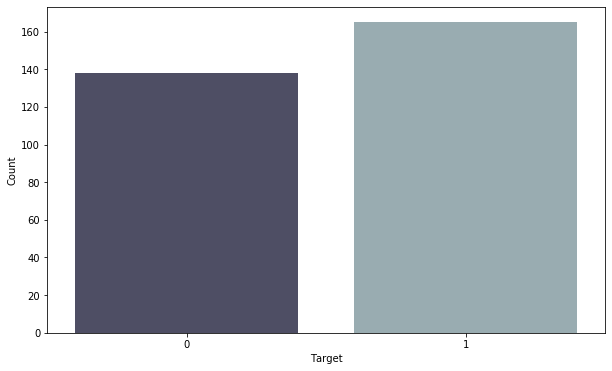

In [11]:
print("Nos of observations recorded: ")
print(df.target.value_counts())

plt.figure(figsize = (10,6))
sns.countplot(x = 'target',
              data = df,
              palette = 'bone')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

In [12]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

> > `SEX v/s TARGET`

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
df_copy = df.copy(deep=True)

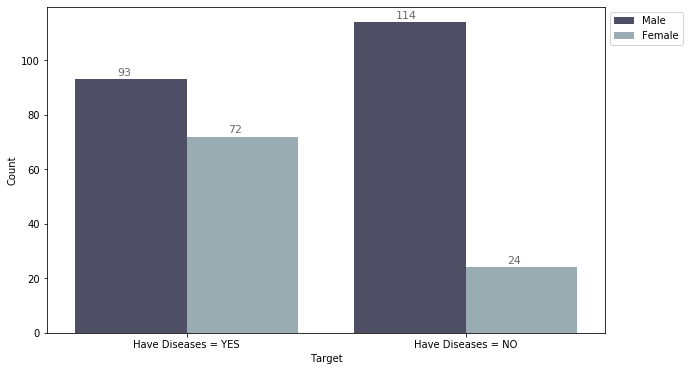

In [15]:
df_copy['sex'].replace({
    1 : 'Male',
    0 : 'Female'
}, inplace = True)

df_copy['target'].replace({
    1 : 'Have Diseases = YES',
    0 : 'Have Diseases = NO'
}, inplace = True)

plt.figure(figsize=(10,6))

ax = sns.countplot(x =df_copy['target'] ,
              data = df_copy,
              palette = 'bone',
              hue = df_copy['sex'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

From the above graph we can say that females are more prone to get heart disease where as there is 50 - 50 % for males.

> > `CP vs TARGET`

In [16]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
df_copy = df.copy(deep=True)

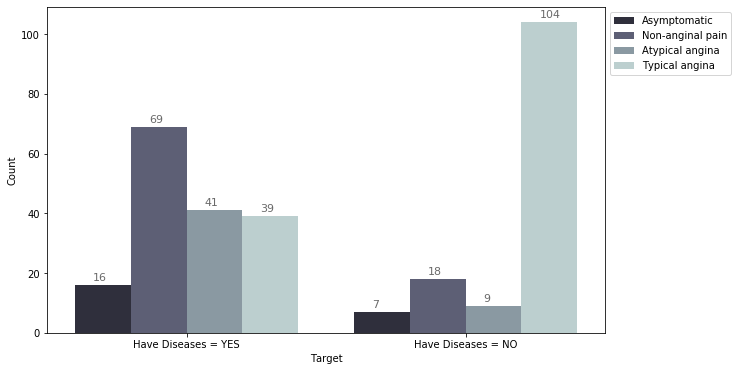

In [18]:
df_copy['cp'].replace({
    0 : 'Typical angina',
    1 : 'Atypical angina',
    2 : 'Non-anginal pain',
    3 : 'Asymptomatic'
}, inplace = True)

df_copy['target'].replace({
    1 : 'Have Diseases = YES',
    0 : 'Have Diseases = NO'
}, inplace = True)

plt.figure(figsize=(10,6))

ax = sns.countplot(x =df_copy['target'] ,
              data = df_copy,
              palette = 'bone',
              hue = df_copy['cp'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

for i in ax.patches:
    ax.text(i.get_x()+.065, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

Persons belonging to 1, 2, 3 category of CP are more likely to have disease rather than people falling into 0 category.

> >  `FBS v/s TARGET`

In [19]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [20]:
df_copy = df.copy(deep=True)

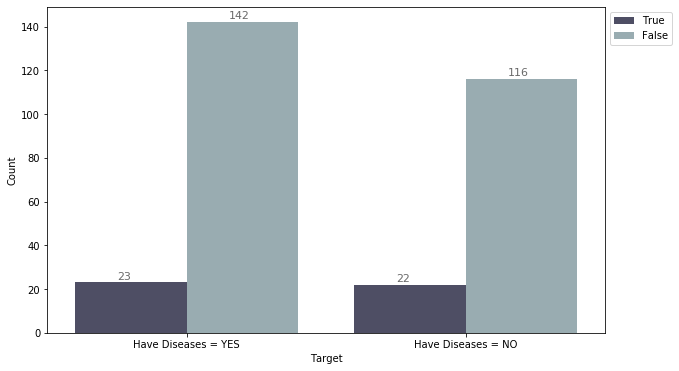

In [21]:
df_copy['fbs'].replace({
    1 : 'True',
    0 : 'False'
}, inplace = True)

df_copy['target'].replace({
    1 : 'Have Diseases = YES',
    0 : 'Have Diseases = NO'
}, inplace = True)

plt.figure(figsize = (10, 6))

ax = sns.countplot(x = df_copy['target'],
              data = df_copy,
              palette = 'bone',
              hue = df_copy['fbs'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    
plt.show()

Person whose FBS might be > 126 mg/dL contribute very less to having heart disease / diabetes. Also we can see that number of persons who are not having diabetes and are having it are somewhat similar. Since we have large number of observation recorded for 0 = FALSE (No signs of Diabetes) still we can see that persons belonging to this category are coming under Having Diseases = YES. There can be various factors which can contribute to this. 

> > `RESTECG v/s TARGET`

In [22]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [23]:
df_copy = df.copy(deep=True)

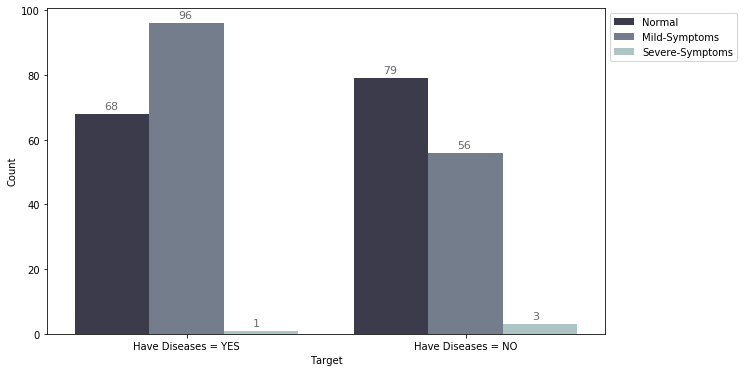

In [24]:
df_copy['restecg'].replace({
    0 : 'Normal',
    1 : 'Mild-Symptoms',
    2 : 'Severe-Symptoms'
}, inplace = True)

df_copy['target'].replace({
    1 : 'Have Diseases = YES',
    0 : 'Have Diseases = NO'
}, inplace = True)

plt.figure(figsize = (10, 6))

ax = sns.countplot(x = df_copy['target'],
              data = df_copy,
              palette = 'bone',
              hue = df_copy['restecg'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

for i in ax.patches:
    ax.text(i.get_x()+.105, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    
plt.show()

Person with Mild-Symptoms are more likely to have heart disease. Also we can see that very less obvservations are reported for person having severe symtoms. For persons belonging to Normal category there can be other features which might be contributing so they are classified under Have Disease = Yes.

> > `EXANG V/S TARGET` 

In [25]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [26]:
df_copy = df.copy(deep=True)

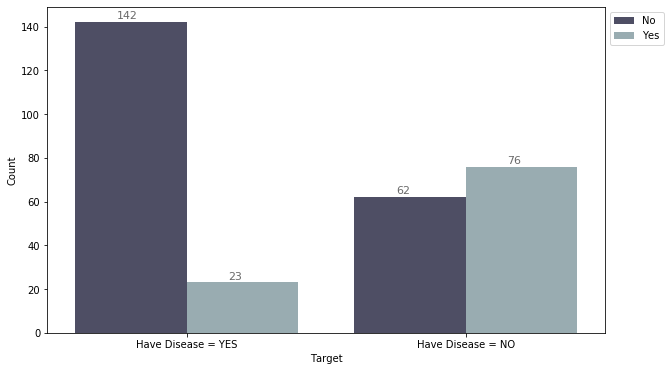

In [27]:
df_copy.exang.replace({
    0 : 'No',
    1 : 'Yes'
}, inplace = True)

df_copy.target.replace({
    0 : 'Have Disease = NO',
    1 : 'Have Disease = YES'
}, inplace = True)

plt.figure(figsize = (10,6))

ax = sns.countplot(x = df_copy['target'],
              data = df_copy,
              palette = 'bone',
              hue = df_copy['exang'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

> > `SLOPE V/S TARGET`

In [28]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [29]:
df_copy = df.copy(deep = True)

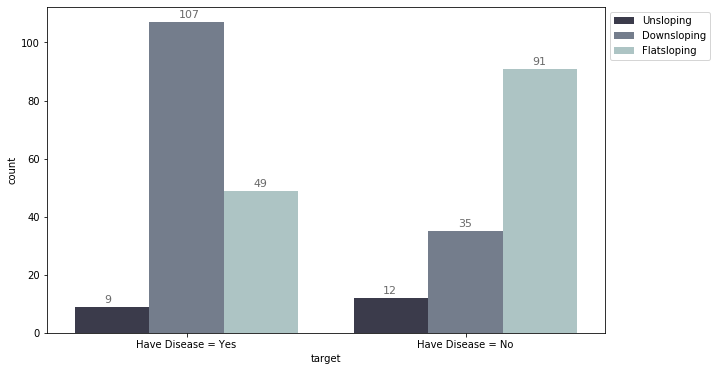

In [30]:
df_copy.slope.replace({
    0 : 'Unsloping',
    1 : 'Flatsloping',
    2 : 'Downsloping'
}, inplace = True)

df_copy.target.replace({
    0 : 'Have Disease = No',
    1 : 'Have Disease = Yes'
}, inplace = True)

plt.figure(figsize = (10,6))

ax = sns.countplot(x = df_copy['target'],
              data = df_copy,
              palette = 'bone',
              hue = df_copy['slope'])

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
          
for i in ax.patches:
    ax.text(i.get_x()+.105, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

> > `CA V/S TARGET`

In [31]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [32]:
df_copy = df.copy(deep = True)

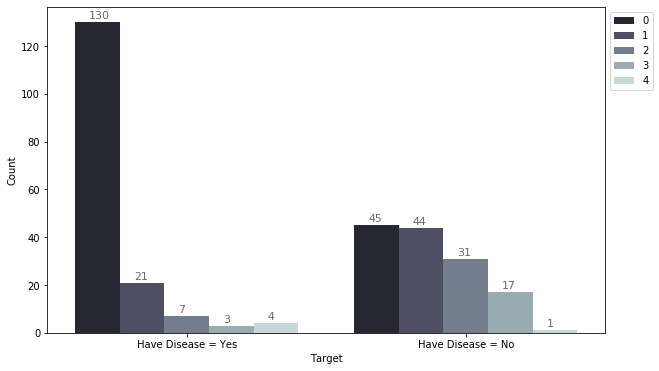

In [33]:
df_copy.target.replace({
    0 : 'Have Disease = No',
    1 : 'Have Disease = Yes'
}, inplace = True)

plt.figure(figsize = (10,6))

ax = sns.countplot(x = df_copy['target'],
              data = df_copy,
              palette = 'bone',
              hue = df_copy['ca'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    
plt.show()

The more blood movement the better so people with ca equal to 0 are more likely to have heart disease which can be also been seen from the above plot.

> > `THAL V/S TARGET`

In [34]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [35]:
df_copy = df.copy(deep=True)

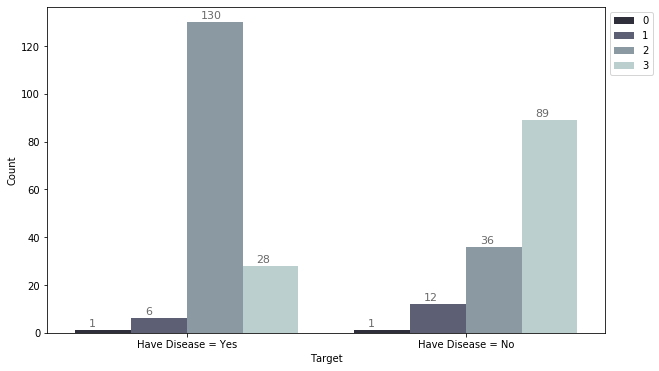

In [36]:
df_copy.target.replace({
    0 : 'Have Disease = No',
    1 : 'Have Disease = Yes'
}, inplace = True)

plt.figure(figsize=(10,6))

ax = sns.countplot(x = df_copy['target'],
              data = df_copy,
              palette = 'bone',
              hue = df_copy['thal'] )
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.xlabel('Target')
plt.ylabel('Count')

for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

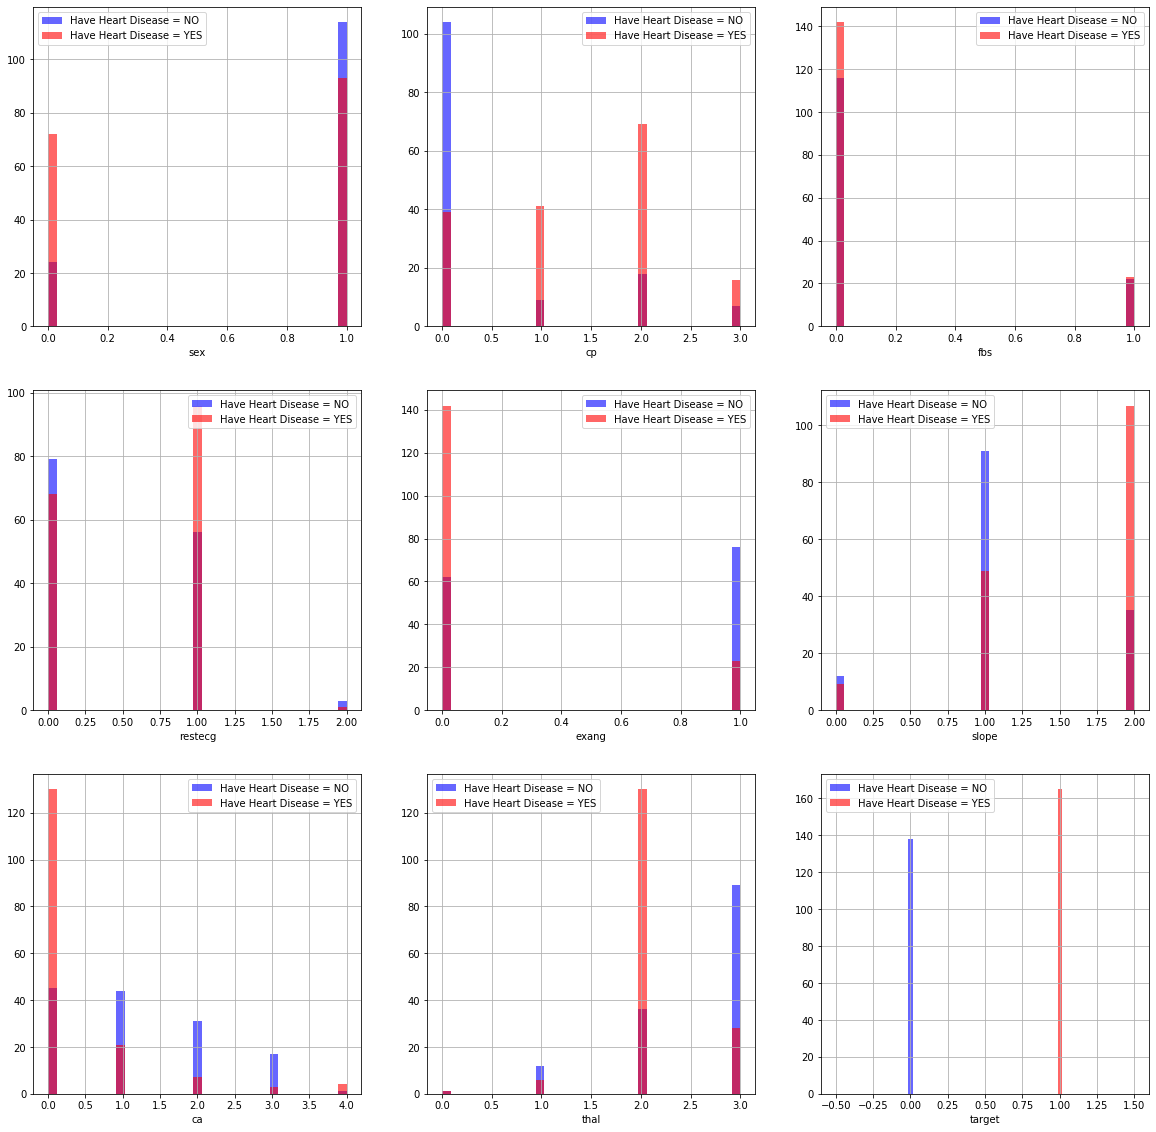

In [37]:
# Representing all categorical values vs target together.

plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO',  alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red',  label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.show()

In [38]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [39]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [40]:
df_copy['cp'].replace({
    0 : 'Typical angina',
    1 : 'Atypical angina',
    2 : 'Non-anginal pain',
    3 : 'Asymptomatic'
}, inplace = True)


df_copy['fbs'].replace({
    1 : 'True',
    0 : 'False'
}, inplace = True)


df_copy['restecg'].replace({
    0 : 'Normal',
    1 : 'Mild-Symptoms',
    2 : 'Severe-Symptoms'
}, inplace = True)


df_copy.exang.replace({
    0 : 'No',
    1 : 'Yes'
}, inplace = True)


df_copy.slope.replace({
    0 : 'Unsloping',
    1 : 'Flatsloping',
    2 : 'Downsloping'
}, inplace = True)

df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,Asymptomatic,145,233,True,Normal,150,No,2.3,Unsloping,0,1,Have Disease = Yes
1,37,1,Non-anginal pain,130,250,False,Mild-Symptoms,187,No,3.5,Unsloping,0,2,Have Disease = Yes
2,41,0,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,2,Have Disease = Yes
3,56,1,Atypical angina,120,236,False,Mild-Symptoms,178,No,0.8,Downsloping,0,2,Have Disease = Yes
4,57,0,Typical angina,120,354,False,Mild-Symptoms,163,Yes,0.6,Downsloping,0,2,Have Disease = Yes


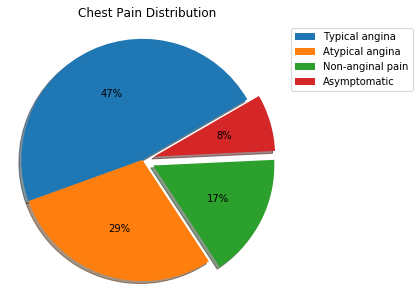

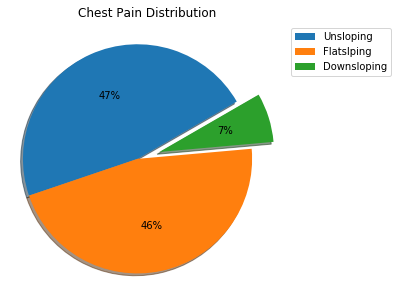

In [41]:
# Representing some categorical value with - Pie chart 

# Chest Pain
labels  = ['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic']
size = df_copy['cp'].value_counts(), 
explode = [0, 0, 0.1, 0.1]
plt.figure(figsize = (5,5))
plt.title("Chest Pain Distribution")
plt.pie(size, explode, shadow=True, autopct='%1.f%%', startangle=30)
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))
plt.show()

#Slope
labels  = ['Unsloping','Flatslping','Downsloping']
size = df_copy['slope'].value_counts(), 
explode = [0, 0, 0.2]
plt.figure(figsize = (5,5))
plt.title("Chest Pain Distribution")
plt.pie(size, explode, shadow=True, autopct='%1.f%%', startangle=30)
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))
plt.show()

#### EDA - Numerical Data  

> > `Age` 

In [42]:
df_copy = df.copy(deep=True)

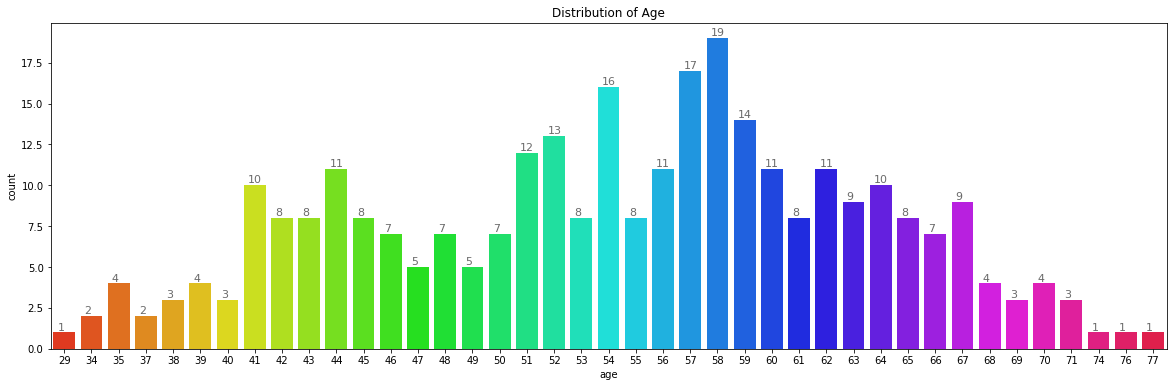

In [43]:
plt.figure (figsize = (20,6))

ax = sns.countplot(df_copy['age'], palette = 'hsv')

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+.15, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.title('Distribution of Age')
plt.show()

In [44]:
#5 point summary

df_copy['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

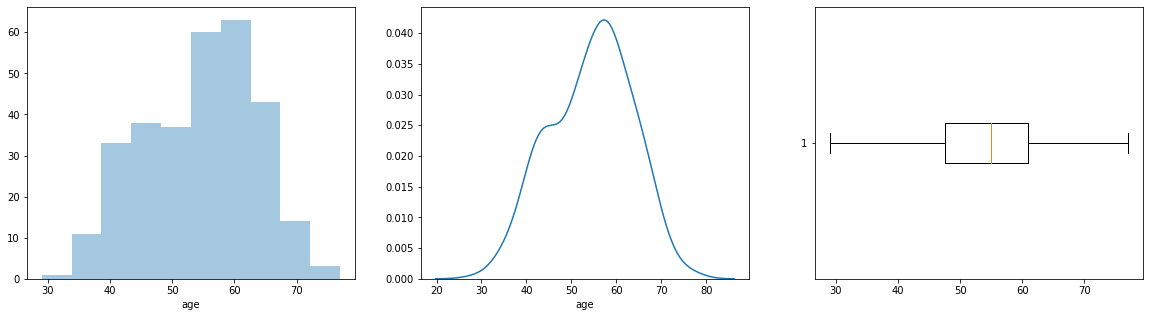

In [45]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df_copy['age'] , kde = False , bins = 10)

plt.subplot(1,3,2)
sns.distplot(df_copy['age'] , hist = False )

plt.subplot(1,3,3)
plt.boxplot(x = df_copy['age'],
            vert = False)

plt.show()

 - Above graphs are conveying the same message but in different manner.


 - It tells us that age attribute is positively right skewed (Mean > Median). We see most of the observations are between      50-60 years of age in our data set.

> > `TRESTBPS`

In [46]:
#5 point summary

df_copy['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

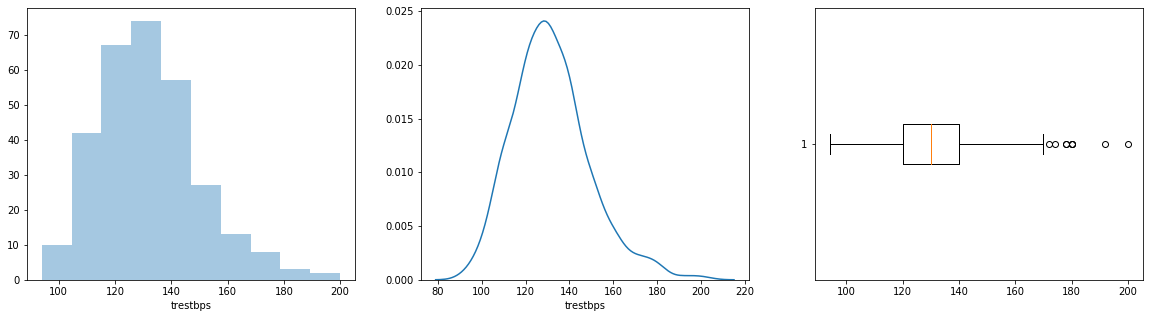

In [47]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df_copy['trestbps'] , kde = False , bins = 10)

plt.subplot(1,3,2)
sns.distplot(df_copy['trestbps'] , hist = False )

plt.subplot(1,3,3)
plt.boxplot(x = df_copy['trestbps'],
            vert = False) 

plt.show()

- Above graphs are conveying the same message but in a different way.


- It tells us that `trestbps` (Blood Pressure) attribute is positively right skewed (Mean ~ Median). Most of the
  observation are between 110-140. 
  

- Generally values above 130 are a cause of concerns.

> > `CHOLESTROL`

In [48]:
#5 point summary

df_copy['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

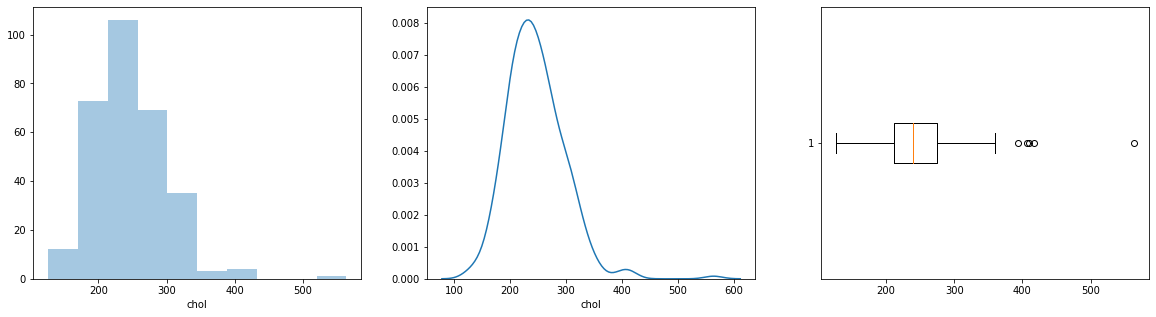

In [49]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df_copy['chol'] , kde = False , bins = 10)

plt.subplot(1,3,2)
sns.distplot(df_copy['chol'] , hist = False )

plt.subplot(1,3,3)
plt.boxplot(x = df_copy['chol'],
            vert = False) 

plt.show()

- Above graphs are conveying the same message but in a different way.


- It tells us that `chol` (serum cholestoral in mg/dl) attribute is positively right skewed (Mean > Median). Most of the
  observation lie between 150 - 300. 
  

- Anything above 200 is a cause of concerns for us as it might reflect some sought of symptoms causing heart disease. 

> > `THALACH`

In [50]:
# 5 point summary 

df_copy['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

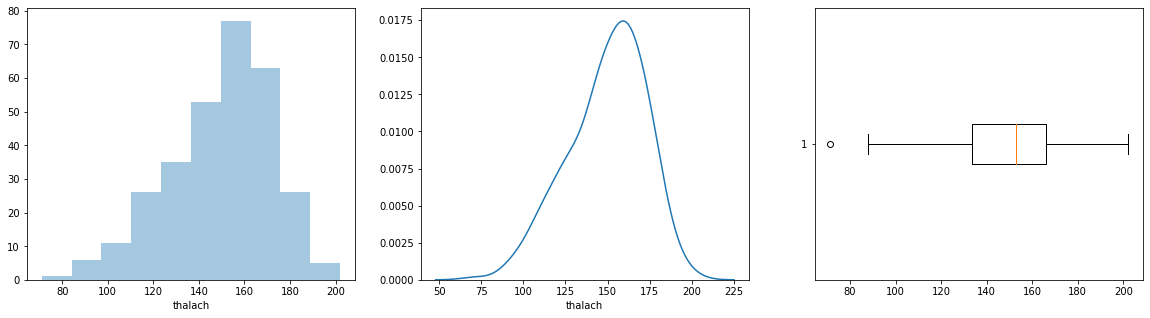

In [51]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df_copy['thalach'] , kde = False , bins = 10)

plt.subplot(1,3,2)
sns.distplot(df_copy['thalach'] , hist = False )

plt.subplot(1,3,3)
plt.boxplot(x = df_copy['thalach'],
            vert = False) 

plt.show()

 - Above graphs are conveying the same message but in differnet way.
  
  
 - It tells us that `thalach` (max heart rate achevied) for most of the patients in our dataset is between 140 - 180. 
 
 
 - Lowest and Max value recorded for thalach is 71 and 202.
 
 
 - Anything above 120 is a cause of concern.

> > `OLDPEAK`

In [52]:
# 5 point summary 

df_copy['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

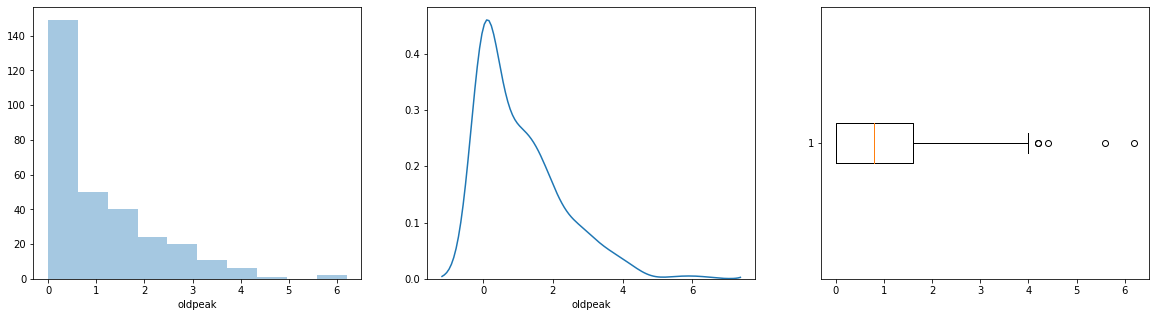

In [53]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df_copy['oldpeak'] , kde = False , bins = 10)

plt.subplot(1,3,2)
sns.distplot(df_copy['oldpeak'] , hist = False )

plt.subplot(1,3,3)
plt.boxplot(x = df_copy['oldpeak'],
            vert = False) 

plt.show()

 - Above graphs are conveying the same message but in differnet way.
  
  
 - `olpeak`  is basically -> (ST depression induced by exercise relative to rest) 
 
 
 - It basically tells us that the distribution of the value is positively skewed.

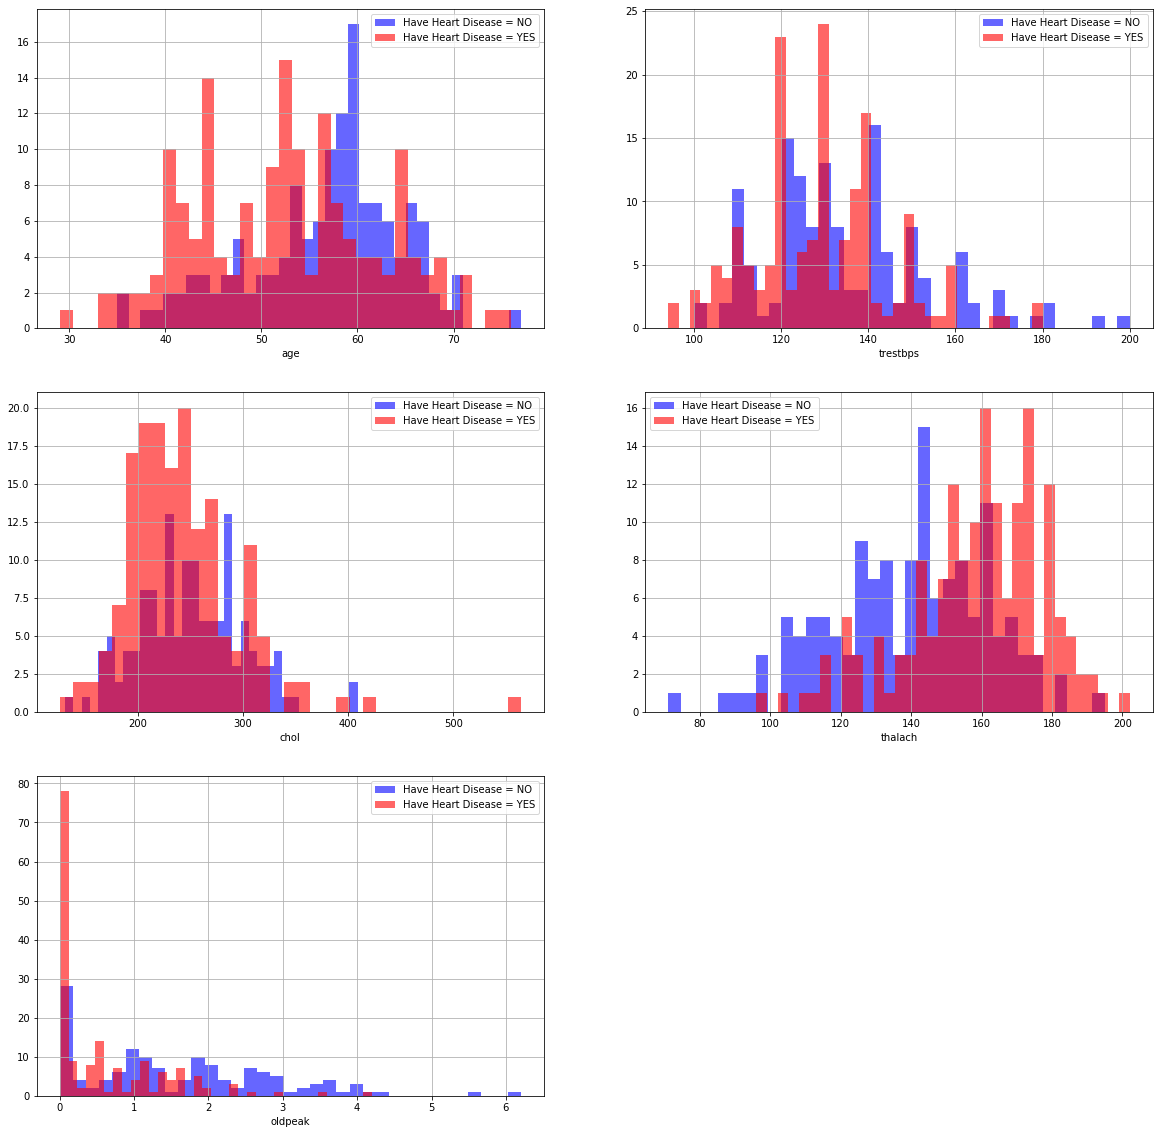

In [54]:
# Representing all continous values with target variable.

plt.figure(figsize=(20, 20))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red',  label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.show()

  - `trestbps` : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern


  - `chol` (serum cholestoral in mg/dl) : above 200 is cause for concern.


  - `thalach` (maximum heart rate achieved) : People how acheived a maximum more than 140 are more likely to have heart disease.


  - `oldpeak` (ST depression induced by exercise relative to rest) looks at stress of heart during excercise unhealthy heart will stress more

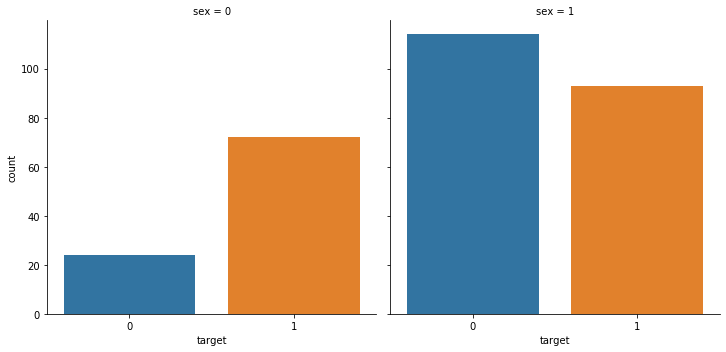

In [55]:
# Using Factor Plot / Cat pLot to plot categorical values

sns.factorplot(x = 'target',
              col = 'sex',
              data = df_copy,
              kind = 'count')
plt.show()

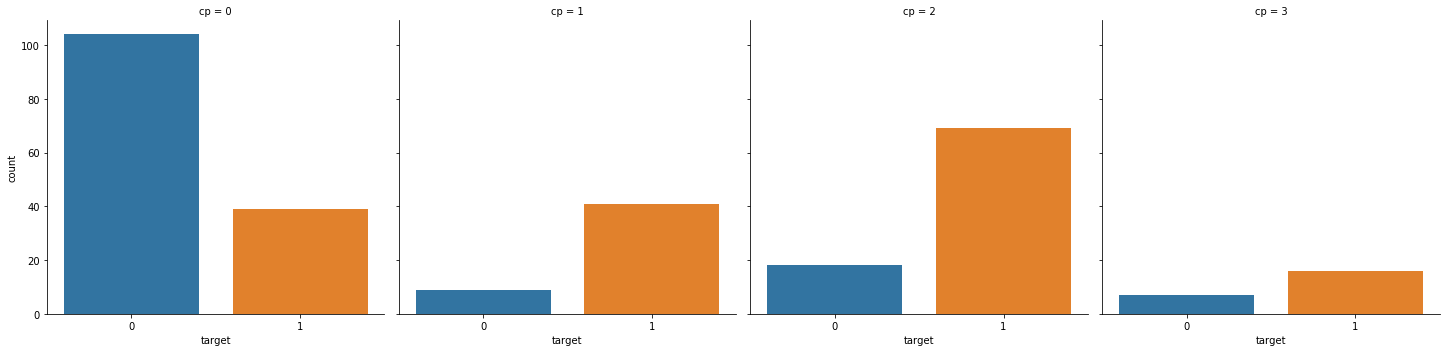

In [56]:
sns.factorplot(x = 'target',
               col = 'cp',
               data = df_copy,
               kind = 'count')
plt.show()

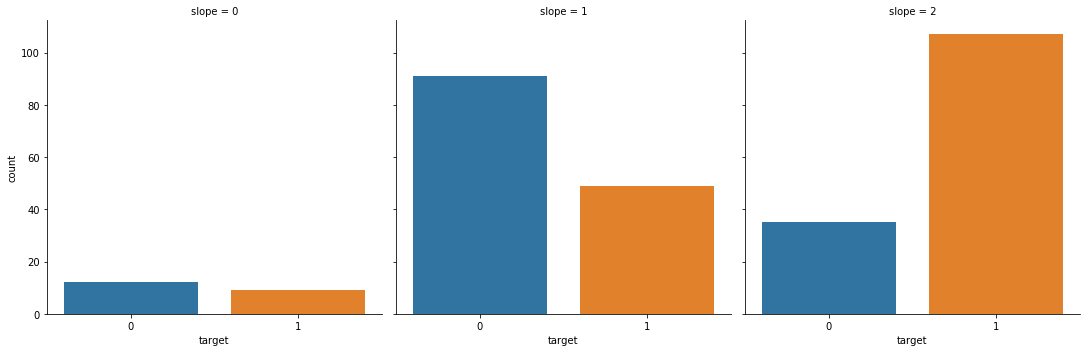

In [57]:
sns.factorplot(x = 'target',
               col = 'slope',
               data = df_copy,
               kind = 'count')
plt.show()

#### Splitting - Independent & Depenedent 

In [58]:
X = df.iloc[:, 0:13]
y = df.iloc[:, 13:14]

### STEP 5 : FEATURE SELECTION

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#renaming dataframe columns
featureScores.columns = ['Specs','Score']

#getting 10 best features.
print(featureScores.nlargest(10,'Score'))  

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


In [60]:
featureScores.head()

,Specs,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394


In [61]:
featureScores.set_index(keys = 'Specs', 
                        inplace = True)

featureScores.sort_values(by = 'Score')

,Score
Specs,
fbs,0.202934
restecg,2.978271
thal,5.791853
sex,7.576835
slope,9.804095
trestbps,14.823925
age,23.286624
chol,23.936394
exang,38.914377


In [62]:
featureScores.sort_values(by = 'Score', inplace = True)

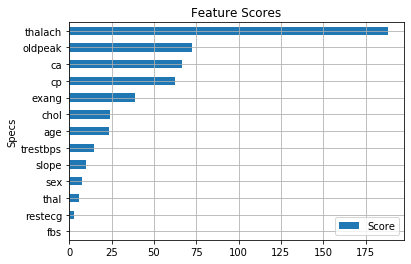

In [63]:
featureScores.plot(kind = 'barh',
                   grid = True,
                   title = 'Feature Scores')

 - We will select those features whose score are near to 50 and above.
 
 
 - As per above bar graph we see that `thalach` play more a vital role followed by `oldpeak`, `ca`, `cp` & to very less        extent `exang` has approx 50 % chances in contributing to Heart Disease = YES
 
 
 - Other features contribute very less so it is better not to include in training our classification model.

(14.0, 0.0)

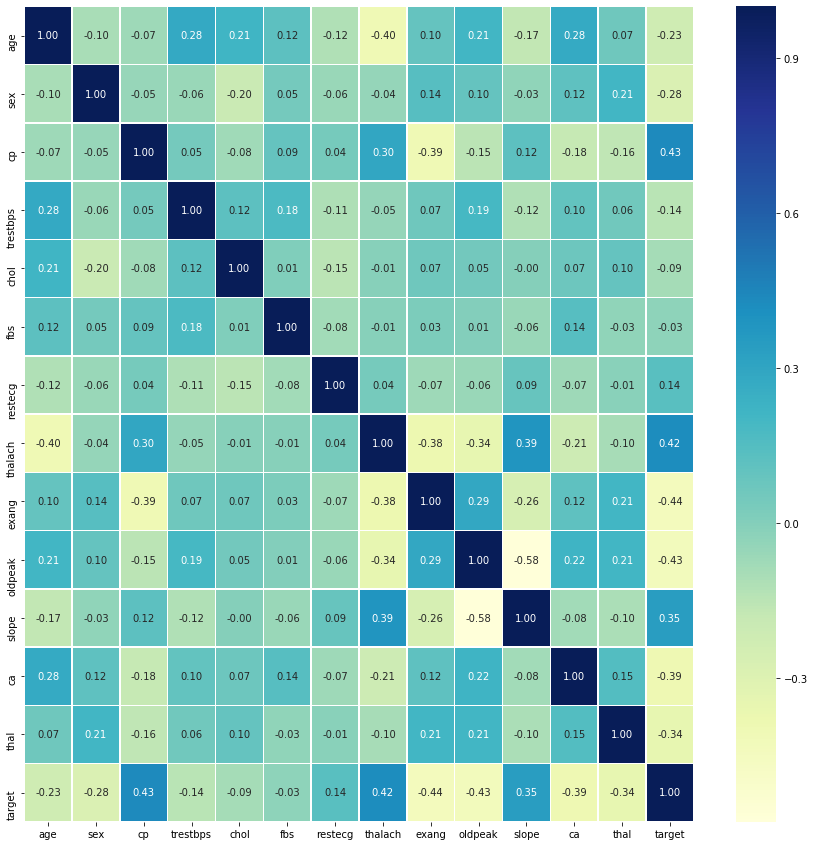

In [64]:
# Heat Map

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

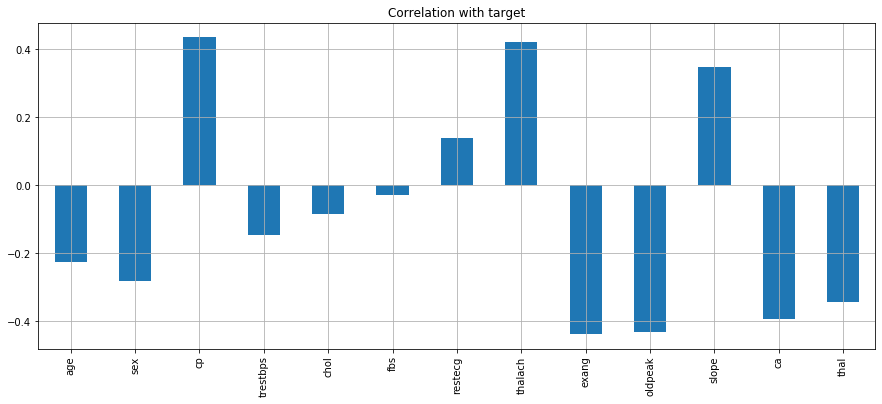

In [65]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(15, 6), 
                                                   title="Correlation with target")

As per above plot we can observe the following details:

   - `fb` and `chol` have very low negative co-relation w.r.t target.
   
   
   - `cp`, `restecg`, `thalach`, `slope` features are positively related with the target variable
   
   
   - All other variables have a significant negative correlation with the target variable

**Based on Feature Scores obtained we will be selecting following features for our model**

  - `thalach` 
  
  - `oldpeak`
  
  - `ca`
  
  - `cp`
  
  - `exang`
  
  

In [66]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
col = ['thalach', 'oldpeak', 'ca', 'cp', 'exang', 'target']

df_latest = df[col]
df_latest.head()

,thalach,oldpeak,ca,cp,exang,target
0,150,2.3,0,3,0,1
1,187,3.5,0,2,0,1
2,172,1.4,0,1,0,1
3,178,0.8,0,1,0,1
4,163,0.6,0,0,1,1


### STEP 6 : MODEL BUILDING

#### Splitting Data  - Independent & Dependent

In [88]:
#X1 = df_latest.iloc[:, 0:5].values
X1 = df_latest[['thalach','oldpeak','ca','cp', 'exang']]

#y1 = df_latest.iloc[:, 5:6].values
y1 = df_latest['target']

print("Data Seperated Successfully")

Data Seperated Successfully


#### Splitting Data - Training & Test 

In [89]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

print('Data Seperated Successfully')

Data Seperated Successfully


In [94]:
df1 = X1_test
df2 = y1_test

df_testing = pd.concat(objs = [df1, df2],
                       axis = 1)

In [96]:
df_testing.head()

,thalach,oldpeak,ca,cp,exang,target
225,125,2.6,0,0,1,0
152,155,0.6,0,3,0,1
228,159,0.2,0,3,0,0
201,141,2.8,1,0,1,0
52,146,1.8,3,2,0,1


#### Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X1_train = sc_X.fit_transform(X1_train)
X1_test = sc_X.transform(X1_test)

print ("Feature Scaling Done")

Feature Scaling Done


#### Building Model

> >  `K - Nearest Neighnour`

In [98]:
# Building Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Calculating accuaracy for different values of K's
Ks = 10
mean_acc = np.zeros(Ks-1)
for n in range(1,Ks):
    
    #Train Model & Predict  
    model_KNN = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    y_pred1=model_KNN.predict(X1_test)
    mean_acc[n-1] = metrics.accuracy_score(y1_test, y_pred1)
    print('Accuracy at k =', n, 'is', mean_acc[n-1])

Accuracy at k = 1 is 0.7213114754098361
Accuracy at k = 2 is 0.7213114754098361
Accuracy at k = 3 is 0.7540983606557377
Accuracy at k = 4 is 0.7704918032786885
Accuracy at k = 5 is 0.7868852459016393
Accuracy at k = 6 is 0.8032786885245902
Accuracy at k = 7 is 0.7868852459016393
Accuracy at k = 8 is 0.7868852459016393
Accuracy at k = 9 is 0.7704918032786885


In [99]:
# Using K = 6 as it give high accuracy an building model.
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 6)
model_KNN.fit(X1_train, y1_train)

#Predictions
y_pred1 = model_KNN.predict(X1_test)

#Accuracy
from sklearn import metrics
print("Accuracy : " , metrics.accuracy_score(y1_test, y_pred1) * 100)

Accuracy :  80.32786885245902


> >  `Decision Trees`

In [100]:
#Building Model
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_DT.fit(X1_train, y1_train)

#Prediction
y_pred2 = model_DT.predict(X1_test)

#Accuracy
from sklearn import metrics
print("Accuracy : " , metrics.accuracy_score(y1_test, y_pred2) * 100)

Accuracy :  73.77049180327869


> >  `Support Vector Machine`

In [101]:
# Building Model
from sklearn import svm
model_SVM = svm.SVC(kernel='rbf')
model_SVM.fit(X1_train, y1_train)

#Prediction
y_pred3 = model_SVM.predict(X1_test)

#Accuracy 
from sklearn import metrics
print("Accuracy :" , metrics.accuracy_score(y1_test, y_pred3) * 100)

Accuracy : 80.32786885245902


> >  `Logistic Regression`

In [102]:
#Building Model
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(C = 0.1, solver = 'liblinear', random_state=0)
model_LR.fit(X1_train, y1_train)

#Prediction
y_pred4 = model_LR.predict(X1_test)

#Accuracy
from sklearn import metrics
print("Accuracy :" , metrics.accuracy_score(y1_test, y_pred4) * 100)

Accuracy : 80.32786885245902


> > `Random Forest`

In [103]:
#Building Model
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X1_train, y1_train)

#Prediction
y_pred5 = model_RF.predict(X1_test)

#Accuracy
from sklearn import metrics
print("Accuracy :" , metrics.accuracy_score(y1_test, y_pred5) * 100)

Accuracy : 73.77049180327869


In [104]:
#Visualizing Accuracy 

KNN_score = metrics.accuracy_score(y1_test, y_pred1)
DT_score  = metrics.accuracy_score(y1_test, y_pred2)
SVM_score = metrics.accuracy_score(y1_test, y_pred3)
LR_score  = metrics.accuracy_score(y1_test, y_pred4)
RF_score  = metrics.accuracy_score(y1_test, y_pred5) 

scores    = [KNN_score, DT_score, SVM_score, LR_score, RF_score]
algo_name = ['K-Nearest Neigbour', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression', 'Random Forest']

In [105]:
scores

[0.8032786885245902,
 0.7377049180327869,
 0.8032786885245902,
 0.8032786885245902,
 0.7377049180327869]

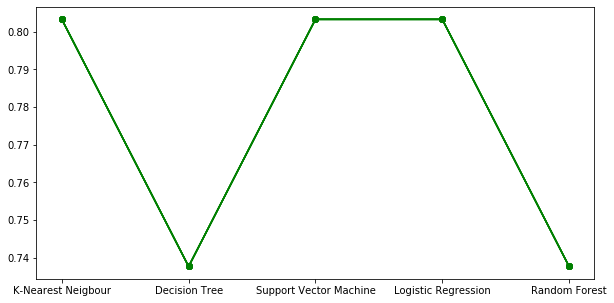

In [106]:
plt.figure(figsize = (10,5))

for i in scores:
    plt. plot(algo_name,
              scores,
              linestyle='-',
              marker='o',
              color = 'green')

plt.show()

#### Confusion Matrix

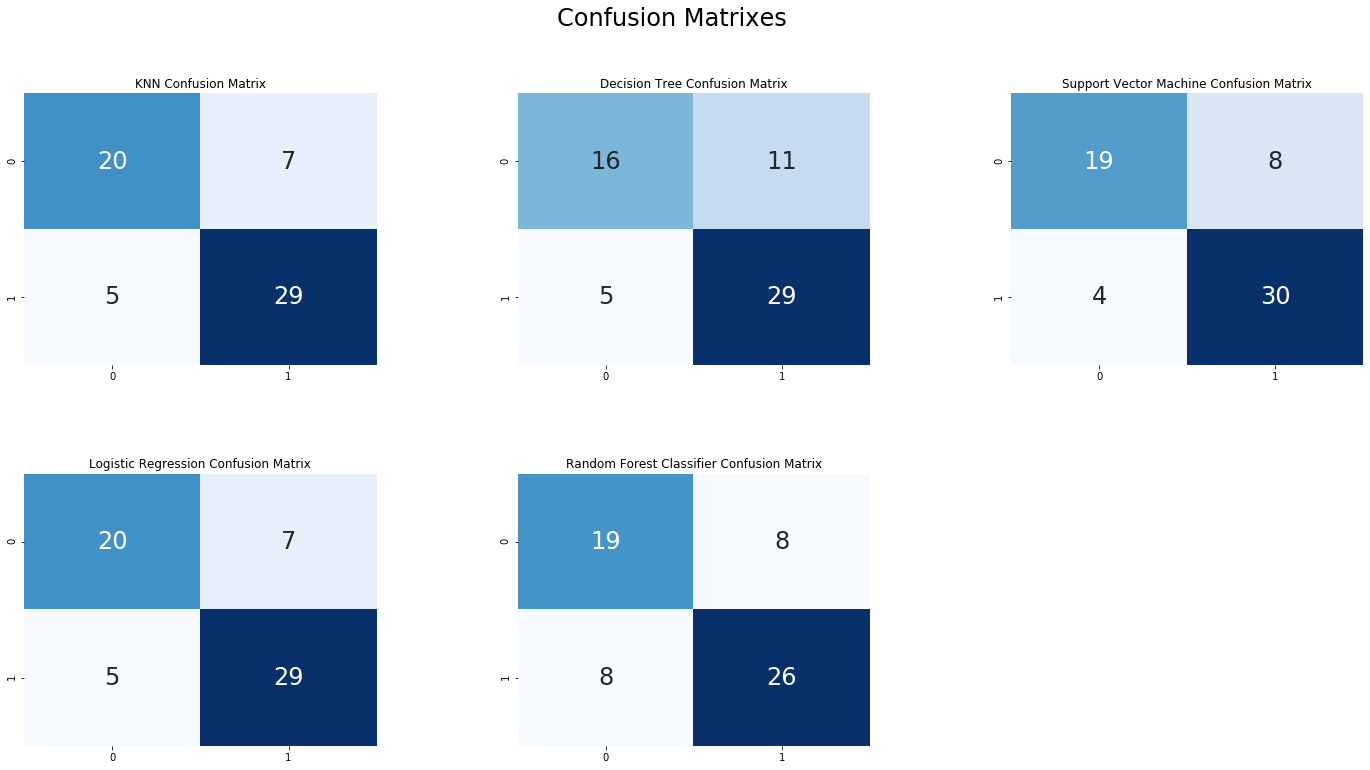

In [107]:
from sklearn.metrics import confusion_matrix

knn_cf  = confusion_matrix(y1_test, y_pred1)
dt_cf   = confusion_matrix(y1_test, y_pred2)
svm_cf  = confusion_matrix(y1_test, y_pred3)
lr_cf   = confusion_matrix(y1_test, y_pred4)
rf_cf   = confusion_matrix(y1_test, y_pred5)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("KNN Confusion Matrix")
ax = sns.heatmap(knn_cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(2,3,2)
plt.title("Decision Tree Confusion Matrix")
ax = sns.heatmap(dt_cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
ax = sns.heatmap(svm_cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(2,3,4)
plt.title("Logistic Regression Confusion Matrix")
ax = sns.heatmap(lr_cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(2,3,5)
plt.title("Random Forest Classifier Confusion Matrix")
ax = sns.heatmap(rf_cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

`Confusion Matrix` - A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.


From the above visualization we can say that `K-Nearest Neighbour` & `Logistic Regression` gives best result in classification test samples of our dataset.

### STEP 7: MODEL TESTING

In [108]:
df_testing.head()

,thalach,oldpeak,ca,cp,exang,target
225,125,2.6,0,0,1,0
152,155,0.6,0,3,0,1
228,159,0.2,0,3,0,0
201,141,2.8,1,0,1,0
52,146,1.8,3,2,0,1


#### TEST - 1

In [119]:
test1 = df_testing.iloc[0:1]
test1

,thalach,oldpeak,ca,cp,exang,target
225,125,2.6,0,0,1,0


In [118]:
# Test 1

test1 = df_testing.iloc[0:1, :-1]

#Applying K-Nearest Neigbour
y_pred_KNN = model_KNN.predict(test1)
print("Targeted Value - K-Nearest Neigbour     : ", y_pred_KNN)

#Applying Decsion Tree
y_pred_DT  = model_DT.predict(test1)
print("Targeted Value - Decision Tree          : ", y_pred_DT)

#Applying Support Vectore Machine
y_pred_SVM = model_SVM.predict(test1)
print("Targeted Value - Support Vector Machine : ",  y_pred_SVM)

#Applying Logistic Regression
y_pred_LR  = model_LR.predict(test1)
print("Targeted Value - Logistic Regression    : ",  y_pred_LR)

#Applying Random Forest
y_pred_RF = model_RF.predict(test1)
print("Targeted Value - Random Forest          : ",  y_pred_RF)

Targeted Value - K-Nearest Neigbour     :  [1]
Targeted Value - Decision Tree          :  [0]
Targeted Value - Support Vector Machine :  [0]
Targeted Value - Logistic Regression    :  [1]
Targeted Value - Random Forest          :  [0]


We can see from the above result that `Decison Tree`, `Support Vector Machine` & `Random Forest` provide us the correct result.

#### TEST - 2

In [117]:
test2 = df_testing.iloc[1:2]
test2

,thalach,oldpeak,ca,cp,exang,target
152,155,0.6,0,3,0,1


In [120]:
# Test 1

test2 = df_testing.iloc[1:2, :-1]

#Applying K-Nearest Neigbour
y_pred_KNN = model_KNN.predict(test2)
print("Targeted Value - K-Nearest Neigbour     : ", y_pred_KNN)

#Applying Decsion Tree
y_pred_DT  = model_DT.predict(test2)
print("Targeted Value - Decision Tree          : ", y_pred_DT)

#Applying Support Vectore Machine
y_pred_SVM = model_SVM.predict(test2)
print("Targeted Value - Support Vector Machine : ",  y_pred_SVM)

#Applying Logistic Regression
y_pred_LR  = model_LR.predict(test2)
print("Targeted Value - Logistic Regression    : ",  y_pred_LR)

#Applying Random Forest
y_pred_RF = model_RF.predict(test2)
print("Targeted Value - Random Forest          : ",  y_pred_RF)

Targeted Value - K-Nearest Neigbour     :  [1]
Targeted Value - Decision Tree          :  [1]
Targeted Value - Support Vector Machine :  [0]
Targeted Value - Logistic Regression    :  [1]
Targeted Value - Random Forest          :  [0]


We can see from the above result that `K-Nearest Neigbour`, `Decision Tree` & `Random Forest` provide us the correct result.

### STEP 8 - CONCLUSION

 - Various machine learning algorithms (`K-Nearest Neigbour`, `Decision Tree`, `Support Vector Machine`, `Logistic Regression` and `Random Forest` where used and able to predict the target class correctly. We could see out of 5 algorithms used, always 3 algorithms used to give right predictions.
 
 
 - Accuracy of 'K-Nearest Neigbours`, `Support Vector Machine` & `Logistic Regression where on higher side i.e 80 % as compared to Tree based algorithms.
 
 
 - Due to less amount of data tree based algorithms could not provide proper accuracy. 
 
 
 - We had created our own feature set and provided to model for training. We applied Feature Engineering to choose best features and later applied Feture Scaling so that all values be in same scale.
 
 
 - We also saw the features which are positively related and negatively releated to our target class.
 
 
 - Various insights could be derived from EDA steps like some features are right skewed or left skewed, `slope` for example people showing Downsloping had disease but we had that type of very very less as it could be seen from visualization. Also `ca` (flouroscopy) for example, people having less value had disease and in this case we had more amount of data etc.
 
 
 - Overall we can improvized it further by including more amount of data and having little bit of domain knowledge which will allow us to select best feature for our model to get trained and in reture we get better accuracy.
 